<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_1_KMeans_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Tutorial

- the k-means algorithm is computationally efficient compared to other clustering algorithms
- it belongs to the category of **prototype-based clustering**
    - each cluster is represented by a prototype, which can be
        - the centroid (average) of similar points with continuous features
        - the medoid (the most representative or most frequently occuring point) in the case of categorical features
- k-means is very good and identifying clusters with a spherical shape
    - must specify the number of clusters, k, a priori

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

import numpy as np

In [2]:
X, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

In [3]:
X.shape, y.shape

((150, 2), (150,))

In [4]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [5]:
y[:5]

array([1, 0, 0, 0, 1])

In [6]:
np.unique(y)

array([0, 1, 2])

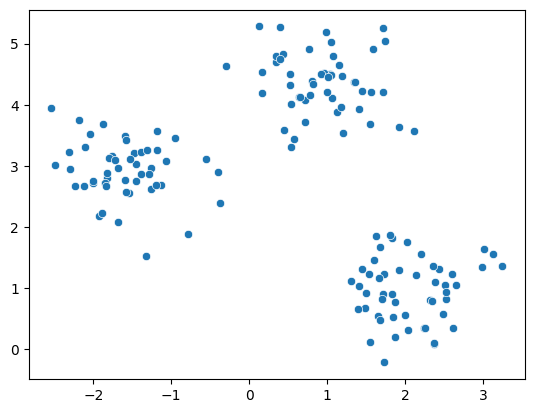

In [7]:
sns.scatterplot(x = X[:, 0],
            y = X[:, 1])
plt.show()

- Note, that in a real-world application we do not have any ground truth category information about the clusters, like we do here,

## The k-means algorithm

1. Randomly pick $k$ centroids fromt the sample points as initial cluster centres
2. Assign each sample to the nearest centroid
3. Move the centroids to the center of the samples that were assigned to it
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached

### How do we measure similarity?

- the opposite of of distance
- the most commonly used difference is the **squared Euclidean distance**
- the formula given is for m-dimensional space

$$
d(x, y)^{2} = \sum_{j=1}^{m}\left(x_{j} - y_{j}\right)^{2} = \lVert x - y \rVert_{2}^{2}
$$

- based on this Euclidean distance metric, the k-means algorithm can be thought of as a simple optimization problem
    - an iterative approach for minimizing the within-cluster **Sum of Squared Errors (SSE)**, aka **cluster intertia**

$$
SSE = \sum_{i=1}^{n}\sum_{j=1}^{k} w^{\left(i, j\right)} \lVert x^{(i)} - u^{(j)} \rVert_{2}^{2}
$$

- $u^{(j)}$ is the centroid for cluster j
- $w^{(i,j)}$ = 1 if the sample $x^{(i)}$ is in cluster $j$, otherwise it is 0

- note that if we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)
km.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [10]:
y_km = km.predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [11]:
sum(y - y_km), sum(y_km - km.labels_)

(0, 0)

In [12]:
y_km_transformed = km.transform(X)

In [13]:
saved_indices = []
for i, item in enumerate(y_km_transformed):
    for j, item_x in enumerate(item):
        if item_x == y_km_transformed.min(axis=1)[i]:
            saved_indices.append(j)

saved_indices == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Visualization

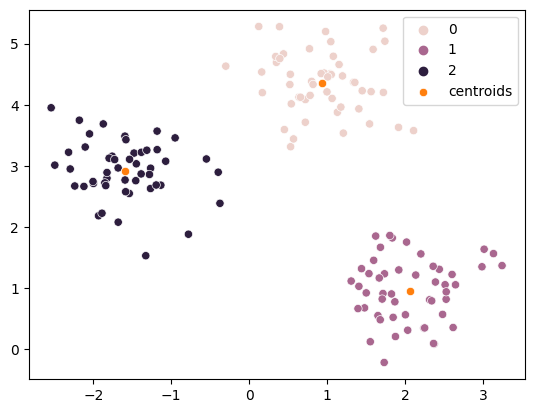

In [14]:
sns.scatterplot(x = X[:, 0],
            y = X[:, 1],
            hue=y_km)

sns.scatterplot(x = km.cluster_centers_[:, 0],
                y = km.cluster_centers_[:, 1], label='centroids')
plt.show()

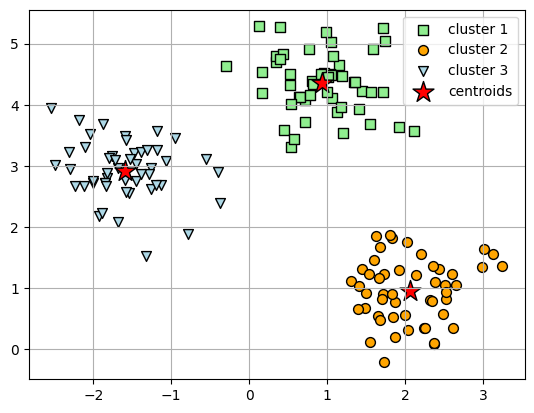

In [15]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### The Elbow Method

- used to determine the optimal $k$
- if $k$ increases, the within-cluster SSE (**distortion**) decreases
    - because the samples will be closer to the centroids they are assigned to
- the idea behind the elbow method is to identify a value of $k$ where the distortion begins to decrease most rapidly

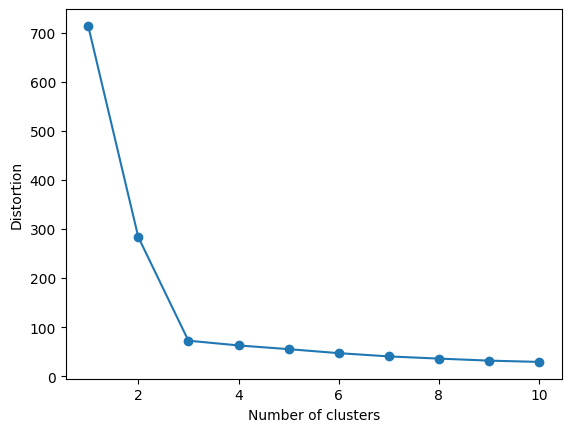

In [16]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- From the visualization we can see that the elbow is located at $k = 3$, which is evidence that $k = 3$ is a good choice for this dataset.